In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import time

In [4]:
from model_class.model_simply_traffic_lights import TrafficSimulation as sim

In [ ]:
dic = '/home/james/masters/industrial_maths/Traffic_SpeedControls_IM_Project2/sim_data/' 

In [5]:
def calculate_mean_var(results_data):
    # allocate mem for speed.
    mean_values = [None]*len(results_data)
    var_values  = [None]*len(results_data) 
    # compute the mean and var for each batch.
    for i,data in enumerate(results_data):
        mean_values[i] = np.mean(data, axis=0)
        var_values[i] =np.var(data, axis=0) 
    return mean_values, var_values

In [6]:
###################################
### 1) road length #################
####################################
def road_length_sim( road_length):
    nt = 200
    car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
    region_lengths = [14]*road_length  # only one speed limit everywhere
    densities = np.linspace(0, 1, 20)

    # not need but set empty 
    traffic_light_list = [] 

    # allocate mem for results to be returned
    flow_rate = np.zeros_like(densities)
    spi  = np.zeros_like(densities) 

    # run sim for the range of densities 
    for index,density in enumerate(densities): 
        ts = sim(region_lengths, traffic_light_list, density, car_slow_down_prob)
        spi_iter = np.zeros(nt)

        for i in range(nt): 
            spi_iter[i] = ts.get_step_spi() 
            ts.update() 
        
        #flow rate 
        flow_rate[index] = ts.data_laps/nt
        # spi 
        spi[index] = np.sum(spi_iter) / nt
    return flow_rate, spi

In [7]:
## road length run sims 
num_cpu = mp.cpu_count() # get how many cpus on system 
pool = mp.Pool(processes=num_cpu)
start_time = time.time()
#
number_of_repeats = 2 # number of iteration for reruns, to compute mean and var, 
data_points  = 20 # np.linspace(0,1,20)
#
road_lengths = [20, 100, 450, 900, 2000]
N = len(road_lengths)
# allocate mem, based on the number of data point and number of repeats.
FR_road_length   = [np.zeros((number_of_repeats, data_points))]*N
SPI_road_length  = [np.zeros((number_of_repeats, data_points))]*N

for i,n in enumerate( road_lengths): 
    # run multiprocessing
    flow, spi =  zip(*pool.map(road_length_sim, [n]*number_of_repeats))
    # reshape to np.array
    
    # reshape to np.array
    FR_road_length[i] = np.array(flow).reshape((number_of_repeats, data_points))
    SPI_road_length[i] = np.array(spi).reshape((number_of_repeats, data_points))


pool.close()
pool.join()
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)
print(f"Elapsed time: {int(minutes)} minutes and {int(seconds)} seconds")

Elapsed time: 23 minutes and 24 seconds


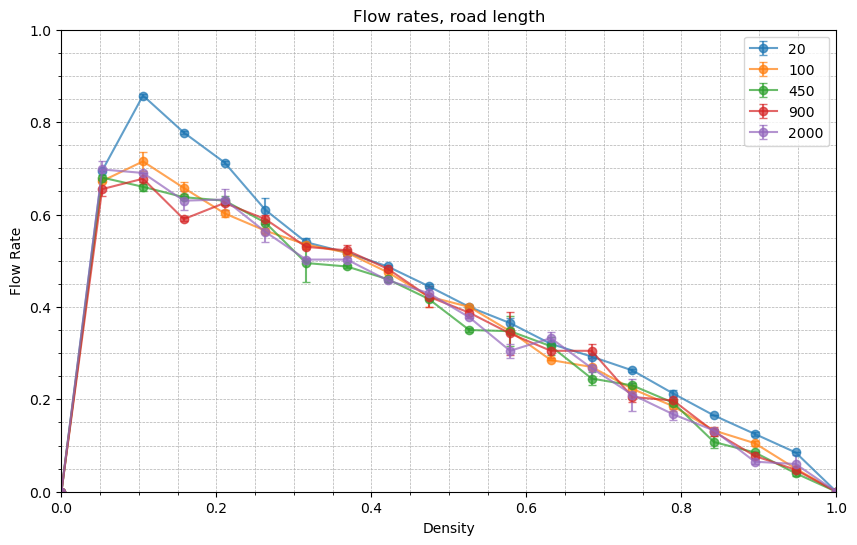

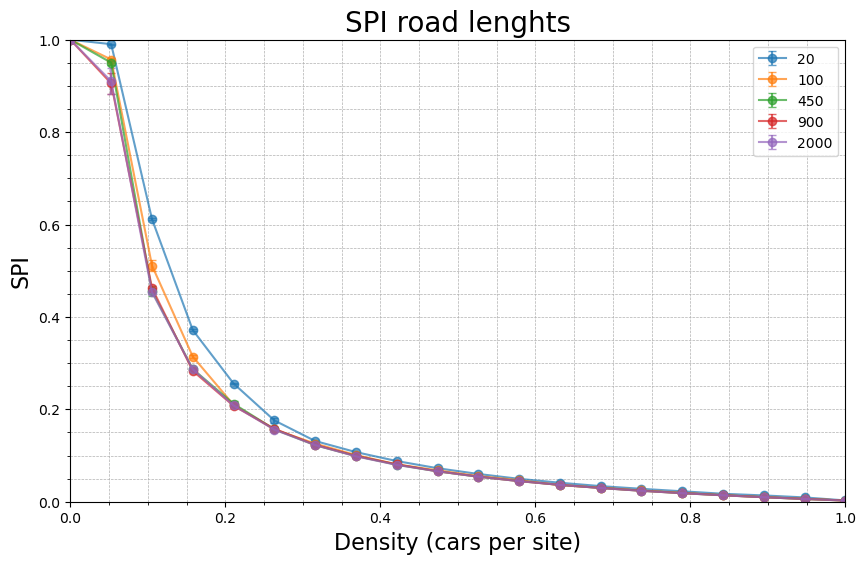

In [8]:
## test print road length 
means_fr,vars_fr = calculate_mean_var(FR_road_length)
means_spi,vars_spi = calculate_mean_var(SPI_road_length)

# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i, mean in enumerate(means_fr):
    offset = 1#7 + (i) # so the graph does not look overcrowed, [::offset] at the end of array
    plt.errorbar( np.linspace(0, 1, 20)[::offset], mean[::offset], yerr=np.sqrt( vars_fr[i] )[::offset] , alpha=0.7, fmt='-o', label=f'{road_lengths[i]}',capsize=3)
plt.title("Flow rates, road length")
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.legend(fontsize='medium',loc='upper right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i, mean in enumerate(means_spi):
    offset = 1 #+ (i) # so the graph does not look overcrowed, [::offset] at the end of array
    plt.errorbar( np.linspace(0, 1, data_points)[::offset], mean[::offset], yerr=np.sqrt( vars_spi[i] )[::offset] , alpha=0.7, fmt='-o', label=f'{road_lengths[i]}',capsize=3)
plt.xlabel(f'Density (cars per site)', size=16)
plt.ylabel('SPI', size=16)
plt.title('SPI road lenghts',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [ ]:
## save road lenght data 
file = 'road_len/'
# Saving each array to disk
for i, n in enumerate(road_lengths):
    np.save(f'{dic}{file}fr_roadlen_{n}.npy', FR_road_length[i])
    np.save(f'{dic}{file}spi_roadlen_{n}.npy', SPI_road_length[i])

# Time step 

In [ ]:
###################################
### 2) time step  #################
####################################
def timestep_sim( step):
    nt = step
    road_length = 856
    car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
    region_lengths = [14]*road_length  # only one speed limit everywhere
    densities = np.linspace(0, 1, 20)

    # not need but set empty 
    traffic_light_list = [] 

    # allocate mem for results to be returned
    flow_rate = np.zeros_like(densities)
    spi  = np.zeros_like(densities) 

    # run sim for the range of densities 
    for index,density in enumerate(densities): 
        ts = sim(region_lengths, traffic_light_list, density, car_slow_down_prob)
        spi_iter = np.zeros(nt)

        for i in range(nt): 
            spi_iter[i] = ts.get_step_spi() 
            ts.update() 
        
        #flow rate 
        flow_rate[index] = ts.data_laps/nt
        # spi 
        spi[index] = np.sum(spi_iter) / nt
    return flow_rate, spi

In [ ]:
## time step run sims 
num_cpu = mp.cpu_count() # get how many cpus on system 
pool = mp.Pool(processes=num_cpu)
start_time = time.time()
#
number_of_repeats = 2 # number of iteration for reruns, to compute mean and var, 
data_points  = 20 # np.linspace(0,1,20)
#
number_of_simulation_steps = [50,100,500,1000] # ,2500]
iter_var = number_of_simulation_steps
N = len(iter_var)
# allocate mem, based on the number of data point and number of repeats.
FR_time_step   = [np.zeros((number_of_repeats, data_points))]*N
SPI_time_step  = [np.zeros((number_of_repeats, data_points))]*N

for i,n in enumerate( iter_var ): 
    # run multiprocessing
    flow, spi =  zip(*pool.map(timestep_sim, [n]*number_of_repeats))
    # reshape to np.array
    
    # reshape to np.array
    FR_road_length[i] = np.array(flow).reshape((number_of_repeats, data_points))
    SPI_road_length[i] = np.array(spi).reshape((number_of_repeats, data_points))

pool.close()
pool.join()
end_time = time.time()
elapsed_time = end_time - start_time
minutes, seconds = divmod(elapsed_time, 60)
print(f"Elapsed time: {int(minutes)} minutes and {int(seconds)} seconds")

In [ ]:
## test print time step  
means_fr,vars_fr = calculate_mean_var(FR_time_step)
means_spi,vars_spi = calculate_mean_var(SPI_time_step)
title = 'Time step'
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i, mean in enumerate(means_fr):
    offset = 1#7 + (i) # so the graph does not look overcrowed, [::offset] at the end of array
    plt.errorbar( np.linspace(0, 1, 20)[::offset], mean[::offset], yerr=np.sqrt( vars_fr[i] )[::offset] , alpha=0.7, fmt='-o', label=f'{iter_var[i]}',capsize=3)
plt.title(f"Flow rates, {title}")
plt.xlabel("Density")
plt.ylabel("Flow Rate")
plt.legend(fontsize='medium',loc='upper right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i, mean in enumerate(means_spi):
    offset = 1 #+ (i) # so the graph does not look overcrowed, [::offset] at the end of array
    plt.errorbar( np.linspace(0, 1, data_points)[::offset], mean[::offset], yerr=np.sqrt( vars_spi[i] )[::offset] , alpha=0.7, fmt='-o', label=f'{iter_var[i]}',capsize=3)
plt.xlabel(f'Density', size=16)
plt.ylabel('SPI', size=16)
plt.title(f'SPI {title}',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [ ]:
## save road lenght data 
file = 'time_step/'
# Saving each array to disk
for i, n in enumerate(iter_var):
    np.save(f'{dic}{file}fr_{n}.npy', FR_time_step[i])
    np.save(f'{dic}{file}spi_{n}.npy', SPI_time_step[i])

# probabilities

In [ ]:
###################################
### 2) time step  #################
####################################
def timestep_sim( step):
    nt = step
    road_length = 856
    car_slow_down_prob = 0.127  # standard value for error from some paper (need ref)
    region_lengths = [14]*road_length  # only one speed limit everywhere
    densities = np.linspace(0, 1, 20)

    # not need but set empty 
    traffic_light_list = [] 

    # allocate mem for results to be returned
    flow_rate = np.zeros_like(densities)
    spi  = np.zeros_like(densities) 

    # run sim for the range of densities 
    for index,density in enumerate(densities): 
        ts = sim(region_lengths, traffic_light_list, density, car_slow_down_prob)
        spi_iter = np.zeros(nt)

        for i in range(nt): 
            spi_iter[i] = ts.get_step_spi() 
            ts.update() 
        
        #flow rate 
        flow_rate[index] = ts.data_laps/nt
        # spi 
        spi[index] = np.sum(spi_iter) / nt
    return flow_rate, spi